## Scripts to generate the plots for Figure 1 for the LocScale2 paper


In [1]:
# Get the imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from locscale.include.emmer.ndimage.profile_tools import compute_radial_profile, frequency_array
from locscale.include.emmer.ndimage.map_utils import load_map


In [2]:
from plot_utils import pretty_plot_radial_profile


In [3]:
emd_3061_unsharpened_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_3061/EMD_3061_unfiltered.mrc"
emd_3061_unsharpened_map, apix = load_map(emd_3061_unsharpened_map_path)

rp_emd_3061_unsharpened = compute_radial_profile(emd_3061_unsharpened_map)
freq = frequency_array(rp_emd_3061_unsharpened, apix)

pdb_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_3061/5a63.pdb"

/home/abharadwaj1/papers/elife_paper/locscale_v2_paper/scripts/jupyter_notebooks/plot_utils.py:588: RuntimeWarning: invalid value encountered in sqrt
  ax2.set_xticklabels([round(1/np.sqrt(x),1) for x in ax1.get_xticks()])
/home/abharadwaj1/papers/elife_paper/locscale_v2_paper/scripts/jupyter_notebooks/plot_utils.py:588: RuntimeWarning: divide by zero encountered in double_scalars
  ax2.set_xticklabels([round(1/np.sqrt(x),1) for x in ax1.get_xticks()])
/home/abharadwaj1/miniconda3/envs/locscale_dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


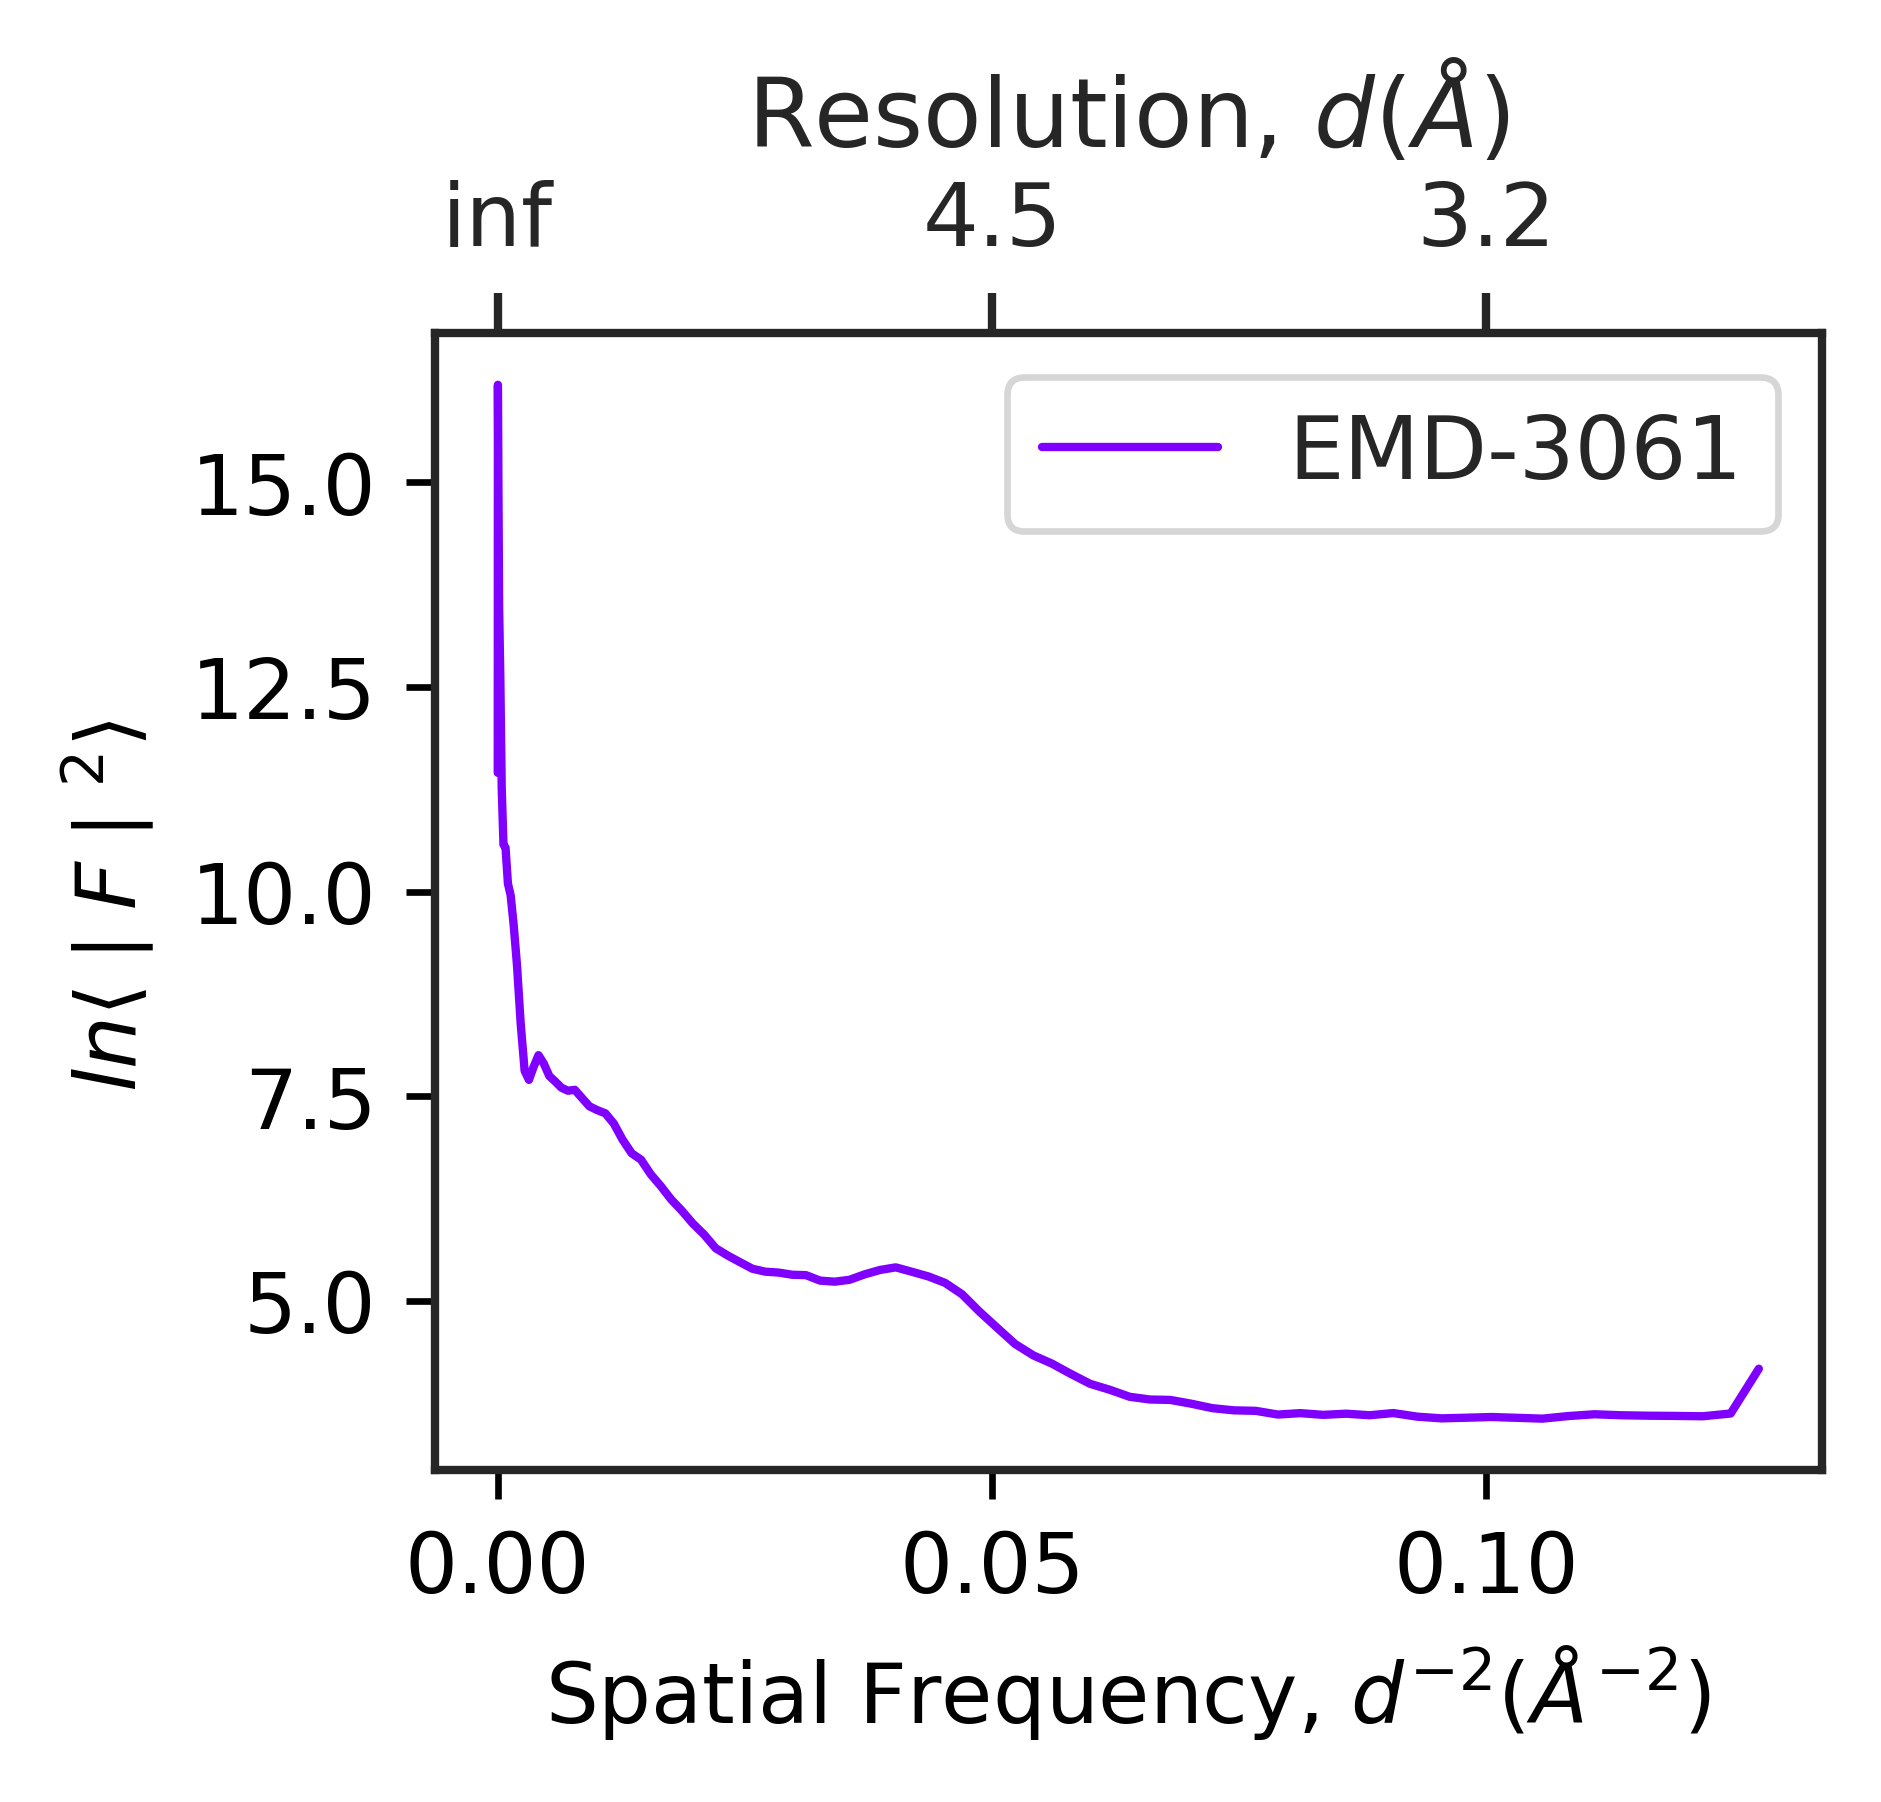

In [4]:
f=pretty_plot_radial_profile(freq, [rp_emd_3061_unsharpened], legends=["EMD-3061"],plot_type="squared_amp",figsize_cm=(8,8), fontscale=1.2)
f.show()

In [5]:
#f.savefig("./outputs/figure_1a.eps", bbox_inches='tight')


In [6]:
emd_3061_local_resolution_data_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/data_dump/EMD-3061-half-1_localResolutions.mrc"
emd_3061_local_resolution_map = load_map(emd_3061_local_resolution_data_path)

Next subplot is to plot the local radial profiles


In [7]:
# Get pdb coordinate
def get_local_profile(emmap_path, pdb_path, chain_name, res_seqid, atom_name, wilson_cutoff,fsc_cutoff, local_resolution_path):
    import gemmi
    from locscale.include.emmer.ndimage.profile_tools import compute_radial_profile, frequency_array, estimate_bfactor_standard
    from locscale.include.emmer.ndimage.map_utils import convert_pdb_to_mrc_position, extract_window, load_map, resample_map

    st = gemmi.read_structure(pdb_path)
    emmap, apix = load_map(emmap_path)
    
    local_resolution_data = load_map(local_resolution_path)[0]
    
    for res in st[0][chain_name]:
        if res.seqid.num == res_seqid:
            ca_atom_position = res.get_ca().pos.tolist()
    
    mrc_position = convert_pdb_to_mrc_position([ca_atom_position], apix)[0]
    window_size_pix = int(round(40/apix))
    emmap_wn = extract_window(emmap, mrc_position, size=window_size_pix)
    #emmap_wn_resampled = resample_map(emmap_wn, apix=apix, apix_new=1, order=2)
    local_resolution_point = local_resolution_data[mrc_position[0], mrc_position[1],mrc_position[2]]
    #print("Local Resolution: {:.2f}".format(local_resolution_point))
    
    rp_emmap_wn = compute_radial_profile(emmap_wn)
    freq = frequency_array(rp_emmap_wn, apix=apix)
    #print("Length of frequency array: {}".format(len(freq)))
    #print("resolution array: {}".format(1/freq))
    
    bfactor, amp, qfit = estimate_bfactor_standard(freq, rp_emmap_wn, wilson_cutoff=wilson_cutoff, fsc_cutoff=local_resolution_point,\
                                                     return_amplitude=True, return_fit_quality=True, standard_notation=True)
    exponential_fit = amp * np.exp(-0.25 * bfactor * freq**2)
    print("Local Resolution: {:.2f}".format(local_resolution_point))
    print("Local B-factor: {:.2f}".format(bfactor))
    print("MRC position: {}".format(mrc_position))
    profiles = {
        'freq':freq,
        'rp':rp_emmap_wn,
        'exp':exponential_fit,
        'qfit':round(qfit,2),
        'fsc':round(local_resolution_point,2),
        'bfactor':round(bfactor,2)}
    
    return profiles




In [27]:
emmap_path = emd_3061_unsharpened_map_path
wilson_cutoff = 10
fsc_resolution = 3.4
local_resolution_map_path = emd_3061_local_resolution_data_path
chain_name_3 = "A"
#res_seqid_3 = 208
atom_name_3 = "CA"
for res_seqid_3 in range(50,100):
    try:
        profiles_3 = get_local_profile(emmap_path, pdb_path, chain_name_3, res_seqid_3, atom_name_3, wilson_cutoff, fsc_resolution,local_resolution_map_path)    
        bfactor_3 = profiles_3['bfactor']
        fsc_3 = profiles_3['fsc']
        if fsc_3 < 4.2 and bfactor_3 < 120:
            print("Residue: {} B-factor: {} FSC: {}".format(res_seqid_3, bfactor_3, fsc_3))
            
    except Exception as e:
        print("Something went wrong for residue: {}".format(res_seqid_3))
        raise e


Local Resolution: 3.11
Local B-factor: 111.38
MRC position: [102, 106, 94]
Residue: 50 B-factor: 111.38 FSC: 3.109999895095825
Local Resolution: 3.11
Local B-factor: 110.02
MRC position: [99, 106, 94]
Residue: 51 B-factor: 110.02 FSC: 3.109999895095825
Local Resolution: 3.11
Local B-factor: 106.95
MRC position: [98, 107, 97]
Residue: 52 B-factor: 106.95 FSC: 3.109999895095825
Local Resolution: 3.11
Local B-factor: 105.29
MRC position: [97, 109, 97]
Residue: 53 B-factor: 105.29 FSC: 3.109999895095825
Local Resolution: 3.11
Local B-factor: 100.00
MRC position: [96, 110, 100]
Residue: 54 B-factor: 100.0 FSC: 3.109999895095825
Local Resolution: 3.11
Local B-factor: 104.92
MRC position: [96, 112, 101]
Residue: 55 B-factor: 104.92 FSC: 3.109999895095825
Local Resolution: 3.14
Local B-factor: 104.82
MRC position: [94, 112, 103]
Residue: 56 B-factor: 104.82 FSC: 3.140000104904175
Local Resolution: 3.28
Local B-factor: 100.74
MRC position: [96, 111, 105]
Residue: 57 B-factor: 100.74 FSC: 3.2799

In [25]:
## Atom spec
chain_name_1 = "A"
res_seqid_1 = 613
atom_name_1 = "CA"

## Atom spec
chain_name_2 = "B"
res_seqid_2 = 380
atom_name_2 = "CA"

## Atom spec
chain_name_3 = "A"
res_seqid_3 = 150
atom_name_3 = "CA"
## Calculation begin

# emmap_path = emd_3061_unsharpened_map_path
# pdb_path = "/home/abharadwaj1/papers/elife_paper/figure_information/inputs/5a63.pdb"
local_resolution_map_path = emd_3061_local_resolution_data_path
wilson_cutoff = 10
fsc_resolution = 3.4

profiles_1 = get_local_profile(emmap_path, pdb_path, chain_name_1, res_seqid_1, atom_name_1, wilson_cutoff, fsc_resolution,local_resolution_map_path)    
profiles_2 = get_local_profile(emmap_path, pdb_path, chain_name_2, res_seqid_2, atom_name_2, wilson_cutoff, fsc_resolution,local_resolution_map_path)    
profiles_3 = get_local_profile(emmap_path, pdb_path, chain_name_3, res_seqid_3, atom_name_3, wilson_cutoff, fsc_resolution,local_resolution_map_path)    


/home/abharadwaj1/miniconda3/envs/locscale_dev/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Local Resolution: 6.70
Local B-factor: 315.58
MRC position: [95, 115, 64]
Local Resolution: 4.18
Local B-factor: 129.40
MRC position: [72, 78, 87]
Local Resolution: 3.96
Local B-factor: 138.07
MRC position: [100, 124, 109]


In [11]:
# dump profiles data into a json file 
import json
from plot_utils import jsonify_dictionary
json_file_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_1/three_local_profiles.json"

profiles_dictionary = {
    'low_res_profile':profiles_1,
    'med_res_profile':profiles_2,
    'high_res_profile':profiles_3
}

with open(json_file_path, 'w') as fp:
    json.dump(jsonify_dictionary(profiles_dictionary), fp, indent=4)

key: low_res_profile, value_is_iterable: False, value_is_dict: True, value_is_float: False,               value_is_int: False, value_is_string: False
key: freq, value_is_iterable: True, value_is_dict: False, value_is_float: False,               value_is_int: False, value_is_string: False
key: rp, value_is_iterable: True, value_is_dict: False, value_is_float: False,               value_is_int: False, value_is_string: False
key: exp, value_is_iterable: True, value_is_dict: False, value_is_float: False,               value_is_int: False, value_is_string: False
key: qfit, value_is_iterable: False, value_is_dict: False, value_is_float: True,               value_is_int: False, value_is_string: False
key: fsc, value_is_iterable: False, value_is_dict: False, value_is_float: False,               value_is_int: False, value_is_string: False
key: bfactor, value_is_iterable: False, value_is_dict: False, value_is_float: True,               value_is_int: False, value_is_string: False
key: med_res_pro

/home/abharadwaj1/papers/elife_paper/locscale_v2_paper/scripts/jupyter_notebooks/plot_utils.py:588: RuntimeWarning: invalid value encountered in sqrt
  ax2.set_xticklabels([round(1/np.sqrt(x),1) for x in ax1.get_xticks()])
/home/abharadwaj1/papers/elife_paper/locscale_v2_paper/scripts/jupyter_notebooks/plot_utils.py:588: RuntimeWarning: divide by zero encountered in double_scalars
  ax2.set_xticklabels([round(1/np.sqrt(x),1) for x in ax1.get_xticks()])


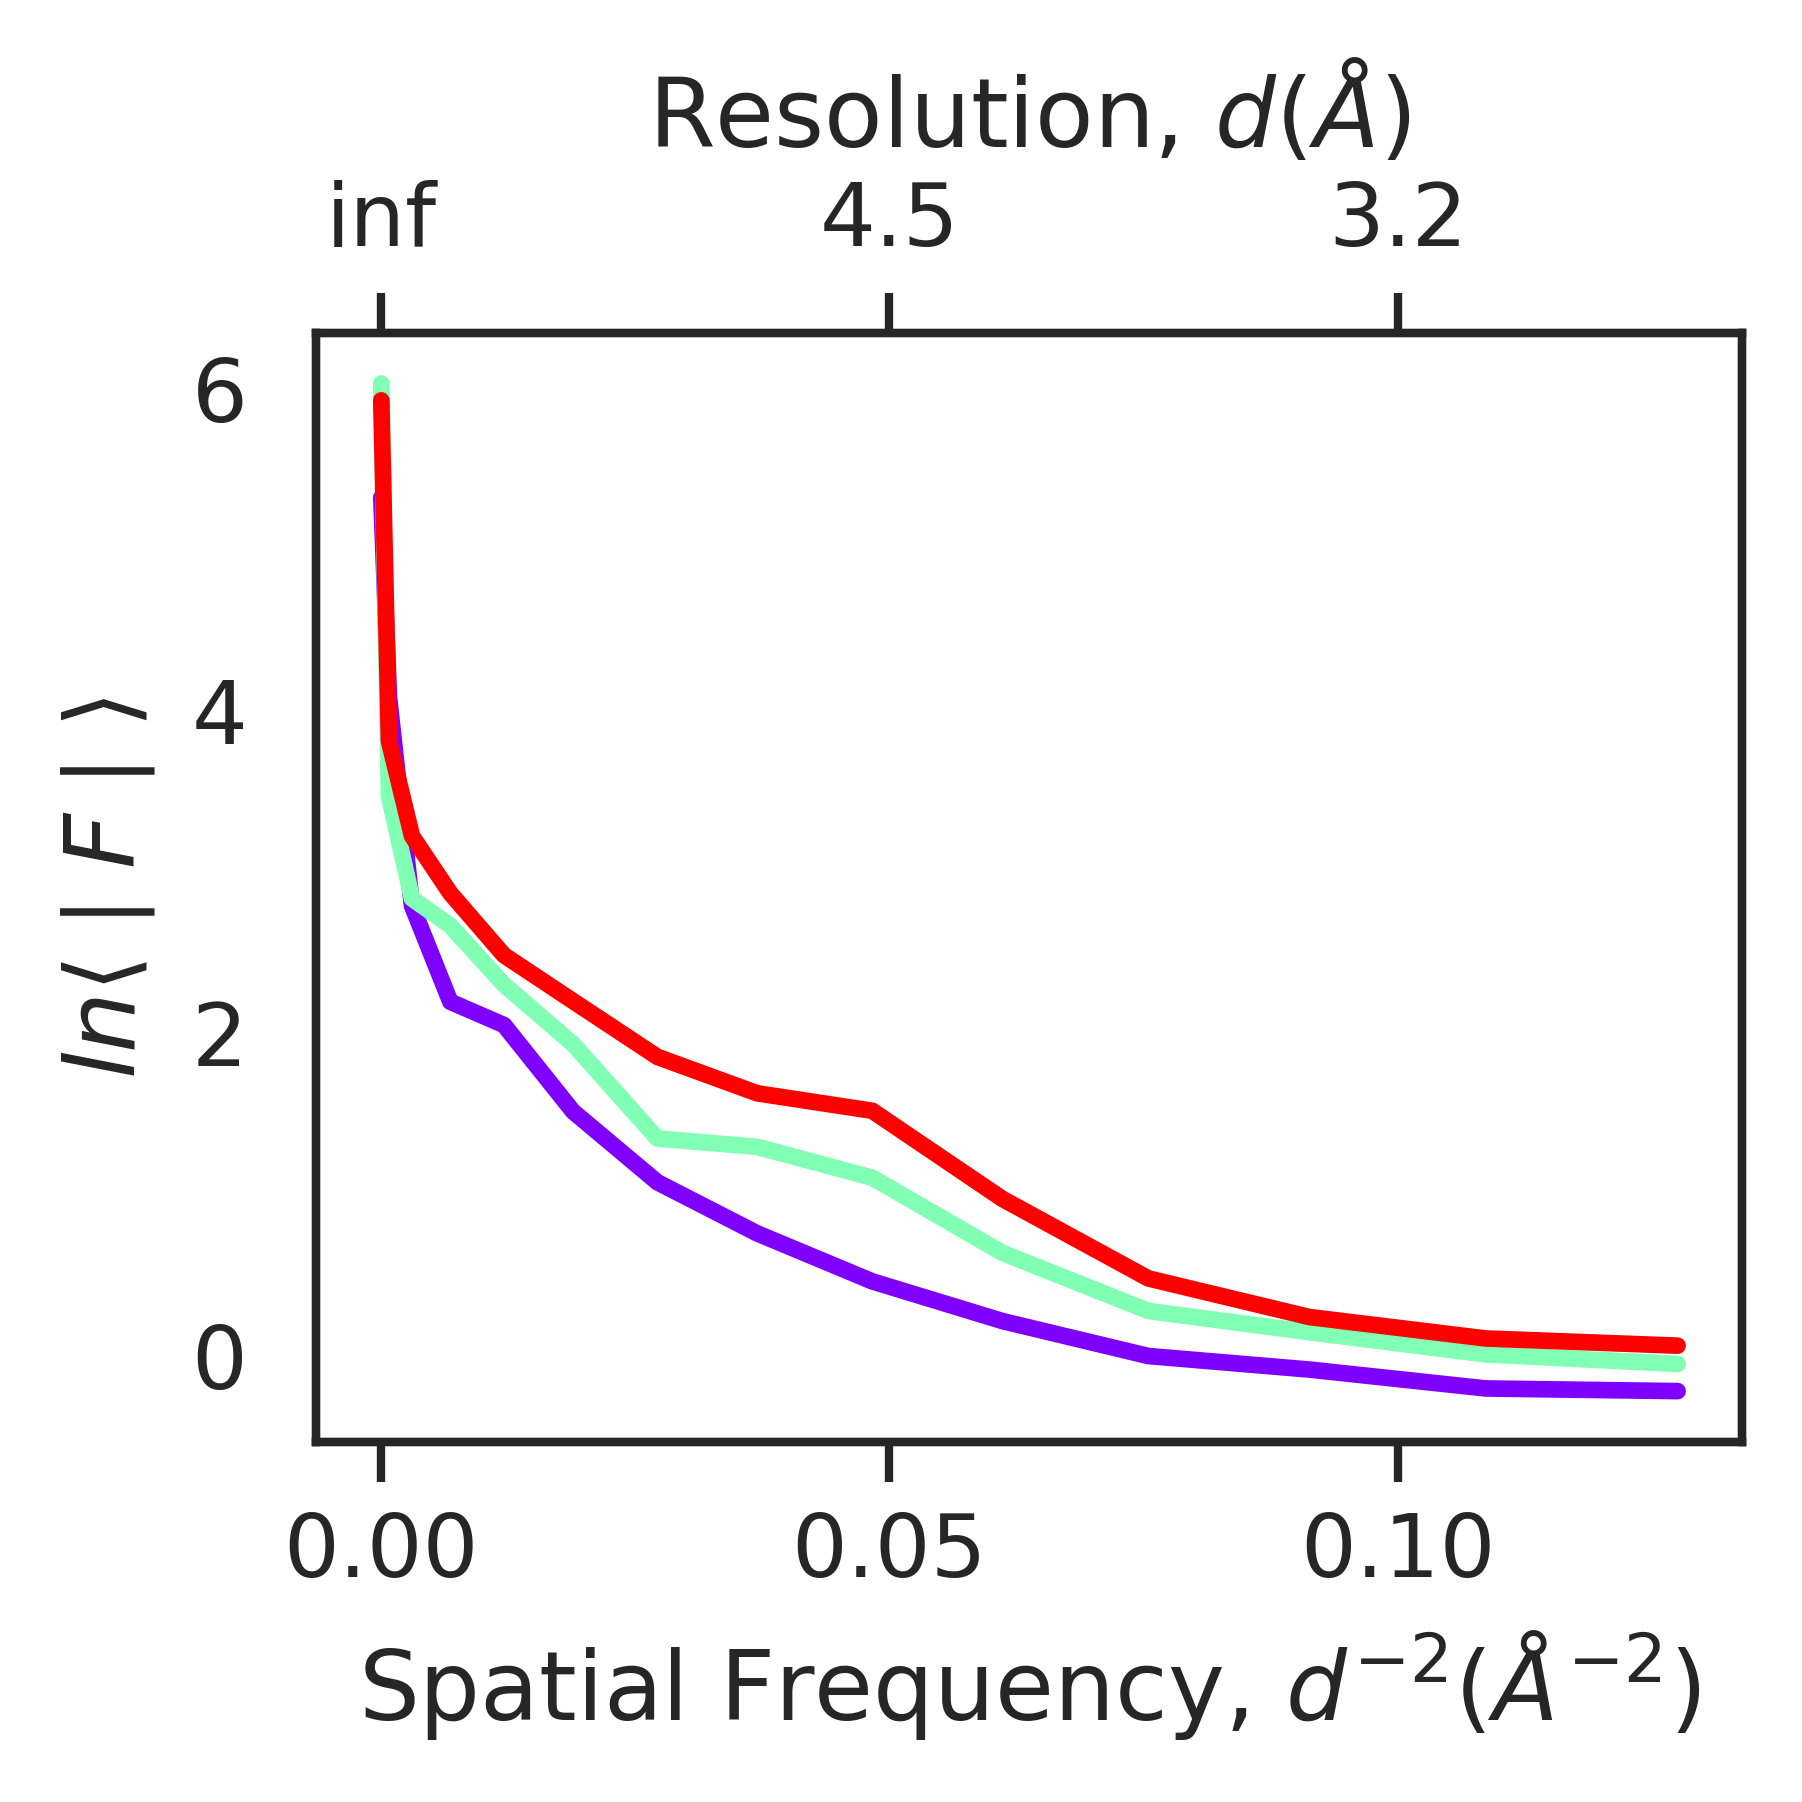

In [22]:


fig_1 = pretty_plot_radial_profile(profiles_1['freq'], [profiles_1['rp'],profiles_2['rp'],profiles_3['rp']], figsize_cm=(8,8),
                                   legends=["$FSC-FDR$: {:.1f}".format(profiles_1['fsc']),"$FSC-FDR$: {:.1f}".format(profiles_2['fsc']),"$FSC-FDR$: {:.1f}".format(profiles_3['fsc'])], 
                                   plot_type="make_log", fontscale=1.2, linewidth=2)

fig_2 = pretty_plot_radial_profile(profiles_1['freq'], [profiles_1['rp'],profiles_2['rp'],profiles_3['rp']],figsize_cm=(8,8), 
                                   legends=["$FSC$: {:.1f}".format(profiles_1['fsc']),"$FSC$: {:.1f}".format(profiles_2['fsc']),"$FSC-FDR$: {:.1f}".format(profiles_3['fsc'])], 
                                   plot_type="make_log", showlegend=False,fontscale=1.2, linewidth=2)



In [13]:
fig_1.savefig("/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_1/local_radial_profiles_res.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
